/tmp/ipykernel_416750/4241053624.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return force / angle * d


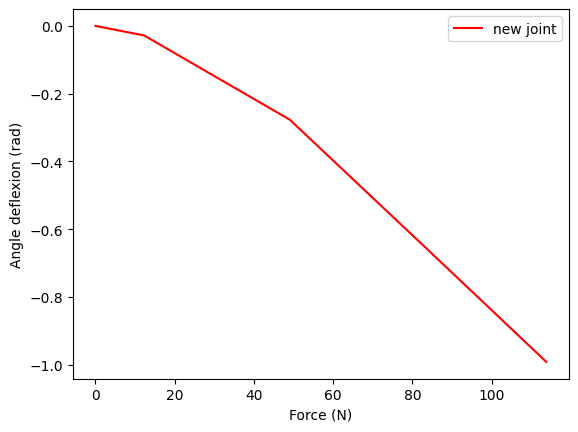

19.26992469566343 0.33632363255069314


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

g = 9.81
joint_lever = 0.03
A = 0.05
B = 0.03

def momemtum(force, angle):
    d = np.sqrt(A**2+B**2)*np.sin(angle)*A/np.sqrt(A**2+B**2-2*A*B*np.cos(angle))
    return force / angle * d

pressures   = np.array([ 0,    1,    2,    3,    4])
free_force  = np.array([ 0, 1.25,    5,  8.5, 11.6]) * g
free_length = np.array([78,   77, 76.2, 75.5,   75])


old_joint_length = np.array([78, 73, 70.5, 69, 67.5])
new_joint_length = np.array([78, 76.5, 73.25, 70.25, 67.525])

old_joint_dangle  = np.deg2rad(np.array([-21.21, -39.6, -77.04, -82.25, -83.6]))
newA_joint_dangle = np.deg2rad(np.array([-6.44, -7.98, -23.86, -44.63, -66.28]))
newB_joint_dangle = np.deg2rad(np.array([3.46, 1.8, -10.83, -33.4, -50.31]))

old_joint_dangle = old_joint_dangle - old_joint_dangle[0]
new_joint_dangle = (newA_joint_dangle - newA_joint_dangle[0] + newB_joint_dangle - newB_joint_dangle[0]) / 2

moments = np.array([momemtum(free_force[i], old_joint_dangle[i]) for i in [0, 1, 2, 3, 4]])

plt.plot(free_force, new_joint_dangle, color="red", label="new joint")
#plt.plot(free_force, old_joint_dangle, color="blue", label="old joint")
plt.xlabel("Force (N)")
plt.ylabel("Angle deflexion (rad)")
plt.legend()
plt.show()

k = abs(np.mean([(moments[i] / new_joint_dangle[i]) for i in [1, 2, 3, 4]]))
print(k, k * 2 * np.pi / 360)